In [58]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest #feature selection
from sklearn.feature_selection import chi2
from sklearn.utils import resample #re-sampling
from sklearn.model_selection import train_test_split #data splitting
from sklearn.preprocessing import StandardScaler #normalize features

from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.naive_bayes import GaussianNB #gaussian naive bayes
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #decision tree
from sklearn.ensemble import RandomForestClassifier #random forest
from sklearn.neighbors import KNeighborsClassifier #k-nearest neighbor
from sklearn.neural_network import MLPClassifier #neural network
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import roc_auc_score #roc score

In [59]:
df_train = pd.read_csv("output_data/data_train.csv")

#### Label Encoding

In [60]:
# label encoder for object features
df_train[["NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
           "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE",
         "NAME_HOUSING_TYPE", "WEEKDAY_APPR_PROCESS_START"]] = df_train[["NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "WEEKDAY_APPR_PROCESS_START"]].apply(LabelEncoder().fit_transform)
columns_to_encode = ["CODE_GENDER", "OCCUPATION_TYPE", 'NAME_FAMILY_STATUS', 'ORGANIZATION_TYPE','NAME_HOUSING_TYPE', 'NAME_TYPE_SUITE' ]
df_train = pd.get_dummies(df_train, columns=columns_to_encode)

In [61]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_HOUSING_TYPE_2,NAME_HOUSING_TYPE_3,NAME_HOUSING_TYPE_4,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied
0,100002,1,0,0,1,0,2025000.0,406597.5,24700.5,351000.0,...,0,0,1,0,0,0,0,0,0,1
1,100003,0,0,0,0,0,2700000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,1,0,0,0,0,0
2,100004,0,1,1,1,0,675000.0,135000.0,6750.0,135000.0,...,0,0,1,0,0,0,0,0,0,1
3,100006,0,0,0,1,0,1350000.0,312682.5,29686.5,297000.0,...,0,0,1,0,0,0,0,0,0,1
4,100007,0,0,0,1,0,1215000.0,513000.0,21865.5,513000.0,...,0,0,1,0,0,0,0,0,0,1


#### Feature Selection

In [62]:
df_train.drop(['SK_ID_CURR'], inplace=True, axis=1)

Fitur yang memiliki nilai negatif `DAYS_BIRTH`, `DAYS_EMPLOYED`, `DAYS_ID_PUBLISH`, `DAYS_REGISTRATION`, and `DAYS_LAST_PHONE_CHANGE`

In [63]:
df_train.iloc[:,16:20] = df_train.iloc[:,16:20].abs()
df_train.iloc[:,:] = df_train.iloc[:,:].abs()

In [64]:
df_train.head()

,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,...,NAME_HOUSING_TYPE_2,NAME_HOUSING_TYPE_3,NAME_HOUSING_TYPE_4,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied
0,1,0,0,1,0,2025000.0,406597.5,24700.5,351000.0,6,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,0,2700000.0,1293502.5,35698.5,1129500.0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,1,1,0,675000.0,135000.0,6750.0,135000.0,6,...,0,0,1,0,0,0,0,0,0,1
3,0,0,0,1,0,1350000.0,312682.5,29686.5,297000.0,6,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,0,1215000.0,513000.0,21865.5,513000.0,6,...,0,0,1,0,0,0,0,0,0,1


In [65]:
x = df_train.drop(['TARGET'], axis=1)
y = df_train['TARGET']

In [66]:
x.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 162 columns):
 #    Column                                    Dtype  
---   ------                                    -----  
 0    NAME_CONTRACT_TYPE                        int32  
 1    FLAG_OWN_CAR                              int32  
 2    FLAG_OWN_REALTY                           int32  
 3    CNT_CHILDREN                              int64  
 4    AMT_INCOME_TOTAL                          float64
 5    AMT_CREDIT                                float64
 6    AMT_ANNUITY                               float64
 7    AMT_GOODS_PRICE                           float64
 8    NAME_INCOME_TYPE                          int32  
 9    NAME_EDUCATION_TYPE                       int32  
 10   REGION_POPULATION_RELATIVE                float64
 11   DAYS_BIRTH                                int64  
 12   DAYS_EMPLOYED                             int64  
 13   DAYS_REGISTRATION                         

In [68]:
# feature selection
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Features', 'Score']
print('The features that correlate well with target feature:\n')
featureScores = featureScores.sort_values(by=['Score'], ascending=False)
print(featureScores.head())
print(featureScores.tail())

The features that correlate well with target feature:

             Features         Score
13  DAYS_REGISTRATION  8.883722e+14
32       EXT_SOURCE_2  1.069548e+13
12      DAYS_EMPLOYED  1.954124e+08
7     AMT_GOODS_PRICE  1.223080e+08
5          AMT_CREDIT  7.669987e+07
                               Features         Score
92        ORGANIZATION_TYPE_Advertising  4.238367e-03
116  ORGANIZATION_TYPE_Industry: type 7  2.708654e-03
59           AMT_REQ_CREDIT_BUREAU_HOUR  1.832008e-03
18                     FLAG_CONT_MOBILE  7.863447e-05
15                           FLAG_MOBIL  2.855786e-07


Dapat dilihat fitur mana saja yang berkorelasi baik dengan kesulitan pembayaran.

1. **Best features**: `DAYS_REGISTRATION`, `EXT_SOURCE_2`, and `DAYS_EMPLOYED`
2. **Worst features**: `FLAG_MOBIL`, `FLAG_CONT_MOBILE`, and `AMT_REQ_CREDIT_BUREAU_HOUR`

#### Check Data Imbalance

In [69]:
# create two different dataframe of majority and minority class 
df_majority = df_train[(df_train['TARGET']==0)] 
df_minority = df_train[(df_train['TARGET']==1)] 

# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 282686, # to match majority class
                                 random_state=42)  # reproducible results

# combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

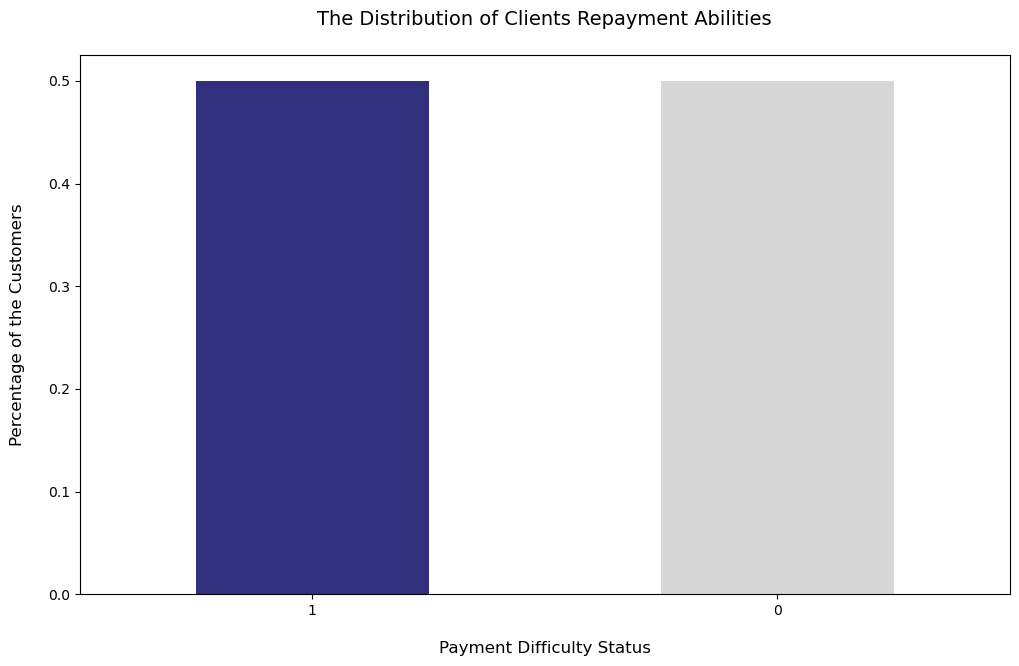

In [70]:
fig = plt.figure(figsize = (12,7))
df_upsampled['TARGET'].value_counts(normalize=True).plot(kind='bar', color= ['midnightblue','lightgrey'], alpha = 0.9, rot=0)
plt.title('The Distribution of Clients Repayment Abilities\n', fontsize=14)
plt.ylabel('Percentage of the Customers\n', fontsize=12)
plt.xlabel('\nPayment Difficulty Status', fontsize=12)
plt.show()

In [79]:
df_train.columns.to_list()

['TARGET',
 'NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT

#### Data Splitting

In [80]:
# define x and y features (top 20 features)
x_balanced = df_upsampled[[
 'NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'CODE_GENDER_F',
 'CODE_GENDER_M',
 'CODE_GENDER_XNA',
 'OCCUPATION_TYPE_Accountants',
 'OCCUPATION_TYPE_Cleaning staff',
 'OCCUPATION_TYPE_Cooking staff',
 'OCCUPATION_TYPE_Core staff',
 'OCCUPATION_TYPE_Drivers',
 'OCCUPATION_TYPE_HR staff',
 'OCCUPATION_TYPE_High skill tech staff',
 'OCCUPATION_TYPE_IT staff',
 'OCCUPATION_TYPE_Laborers',
 'OCCUPATION_TYPE_Low-skill Laborers',
 'OCCUPATION_TYPE_Managers',
 'OCCUPATION_TYPE_Medicine staff',
 'OCCUPATION_TYPE_Private service staff',
 'OCCUPATION_TYPE_Realty agents',
 'OCCUPATION_TYPE_Sales staff',
 'OCCUPATION_TYPE_Secretaries',
 'OCCUPATION_TYPE_Security staff',
 'OCCUPATION_TYPE_Waiters/barmen staff',
 'NAME_FAMILY_STATUS_Civil marriage',
 'NAME_FAMILY_STATUS_Married',
 'NAME_FAMILY_STATUS_Separated',
 'NAME_FAMILY_STATUS_Single / not married',
 'NAME_FAMILY_STATUS_Unknown',
 'NAME_FAMILY_STATUS_Widow',
 'ORGANIZATION_TYPE_Advertising',
 'ORGANIZATION_TYPE_Agriculture',
 'ORGANIZATION_TYPE_Bank',
 'ORGANIZATION_TYPE_Business Entity Type 1',
 'ORGANIZATION_TYPE_Business Entity Type 2',
 'ORGANIZATION_TYPE_Business Entity Type 3',
 'ORGANIZATION_TYPE_Cleaning',
 'ORGANIZATION_TYPE_Construction',
 'ORGANIZATION_TYPE_Culture',
 'ORGANIZATION_TYPE_Electricity',
 'ORGANIZATION_TYPE_Emergency',
 'ORGANIZATION_TYPE_Government',
 'ORGANIZATION_TYPE_Hotel',
 'ORGANIZATION_TYPE_Housing',
 'ORGANIZATION_TYPE_Industry: type 1',
 'ORGANIZATION_TYPE_Industry: type 10',
 'ORGANIZATION_TYPE_Industry: type 11',
 'ORGANIZATION_TYPE_Industry: type 12',
 'ORGANIZATION_TYPE_Industry: type 13',
 'ORGANIZATION_TYPE_Industry: type 2',
 'ORGANIZATION_TYPE_Industry: type 3',
 'ORGANIZATION_TYPE_Industry: type 4',
 'ORGANIZATION_TYPE_Industry: type 5',
 'ORGANIZATION_TYPE_Industry: type 6',
 'ORGANIZATION_TYPE_Industry: type 7',
 'ORGANIZATION_TYPE_Industry: type 8',
 'ORGANIZATION_TYPE_Industry: type 9',
 'ORGANIZATION_TYPE_Insurance',
 'ORGANIZATION_TYPE_Kindergarten',
 'ORGANIZATION_TYPE_Legal Services',
 'ORGANIZATION_TYPE_Medicine',
 'ORGANIZATION_TYPE_Military',
 'ORGANIZATION_TYPE_Mobile',
 'ORGANIZATION_TYPE_Other',
 'ORGANIZATION_TYPE_Police',
 'ORGANIZATION_TYPE_Postal',
 'ORGANIZATION_TYPE_Realtor',
 'ORGANIZATION_TYPE_Religion',
 'ORGANIZATION_TYPE_Restaurant',
 'ORGANIZATION_TYPE_School',
 'ORGANIZATION_TYPE_Security',
 'ORGANIZATION_TYPE_Security Ministries',
 'ORGANIZATION_TYPE_Self-employed',
 'ORGANIZATION_TYPE_Services',
 'ORGANIZATION_TYPE_Telecom',
 'ORGANIZATION_TYPE_Trade: type 1',
 'ORGANIZATION_TYPE_Trade: type 2',
 'ORGANIZATION_TYPE_Trade: type 3',
 'ORGANIZATION_TYPE_Trade: type 4',
 'ORGANIZATION_TYPE_Trade: type 5',
 'ORGANIZATION_TYPE_Trade: type 6',
 'ORGANIZATION_TYPE_Trade: type 7',
 'ORGANIZATION_TYPE_Transport: type 1',
 'ORGANIZATION_TYPE_Transport: type 2',
 'ORGANIZATION_TYPE_Transport: type 3',
 'ORGANIZATION_TYPE_Transport: type 4',
 'ORGANIZATION_TYPE_University',
 'ORGANIZATION_TYPE_XNA',
 'NAME_HOUSING_TYPE_0',
 'NAME_HOUSING_TYPE_1',
 'NAME_HOUSING_TYPE_2',
 'NAME_HOUSING_TYPE_3',
 'NAME_HOUSING_TYPE_4',
 'NAME_TYPE_SUITE_Children',
 'NAME_TYPE_SUITE_Family',
 'NAME_TYPE_SUITE_Group of people',
 'NAME_TYPE_SUITE_Other_A',
 'NAME_TYPE_SUITE_Other_B',
 'NAME_TYPE_SUITE_Spouse, partner',
 'NAME_TYPE_SUITE_Unaccompanied']]
y_balanced = df_upsampled['TARGET']

In [81]:
# splitting tha data
X_train, X_test, y_train, y_test = train_test_split(x_balanced, y_balanced, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(452297, 162) (113075, 162)


In [82]:
# normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#### Build Model

1. Logistic Regression
2. Gaussian Naive Bayes
3. Decision Tree
4. Random Forest
5. K-Nearest Neighbor
6. Neural Network

##### 1. Logistic Regression

In [83]:
# train the model
log_model = LogisticRegression().fit(X_train, y_train)
print(log_model)

LogisticRegression()


C:\Users\ACER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [84]:
# predict data train
y_train_pred_log = log_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Logistic Regression):')
print(classification_report(y_train, y_train_pred_log))

Classification Report Training Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.67      0.67      0.67    226185
           1       0.67      0.66      0.67    226112

    accuracy                           0.67    452297
   macro avg       0.67      0.67      0.67    452297
weighted avg       0.67      0.67      0.67    452297



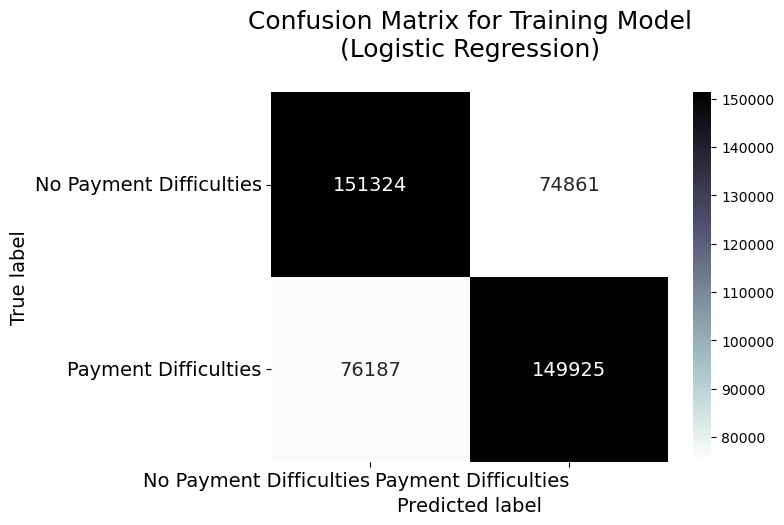

In [85]:
# form confusion matrix as a dataFrame
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_train, y_train_pred_log)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [86]:
# predict data test
y_test_pred_log = log_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred_log))

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.67      0.67      0.67     56501
           1       0.67      0.67      0.67     56574

    accuracy                           0.67    113075
   macro avg       0.67      0.67      0.67    113075
weighted avg       0.67      0.67      0.67    113075



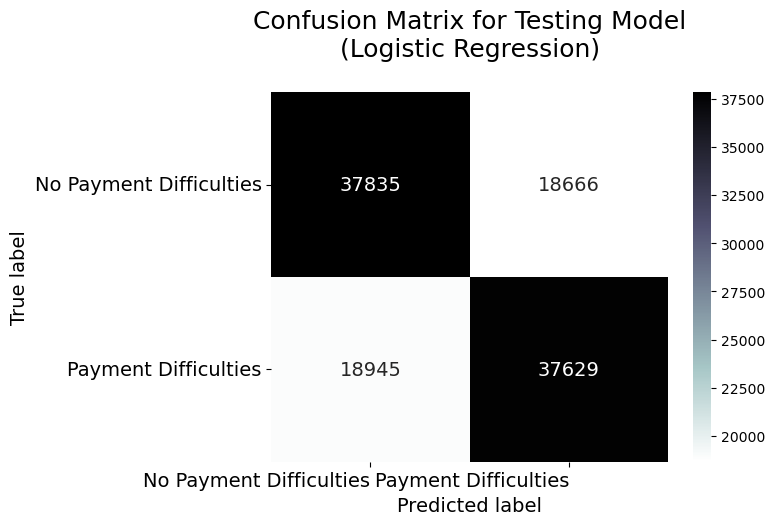

In [87]:
# form confusion matrix as a dataFrame
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_test, y_test_pred_log)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [88]:
acc_log_train=round(log_model.score(X_train,y_train)*100,2)
acc_log_test=round(log_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Test Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 66.6
Test Accuracy: % 66.74


Dapat dilihat bahwa:
- Model regresi logistik memberikan hasil yang benar sebesar 67.16%.
- Terdapat margin kesalahan sebesar 0.14%.

In [89]:
# ROC scores
roc_auc_log = round(roc_auc_score(y_test, y_test_pred_log),4)
print('ROC AUC:', roc_auc_log)

ROC AUC: 0.6674


##### 2. Gaussian Naive Bayes

In [90]:
# train the model
gnb_model = GaussianNB().fit(X_train, y_train)
print(gnb_model)

GaussianNB()


In [91]:
# predict data train
y_train_pred_gnb = gnb_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Gaussian Naive Bayes):')
print(classification_report(y_train, y_train_pred_gnb))

Classification Report Training Model (Gaussian Naive Bayes):
              precision    recall  f1-score   support

           0       0.66      0.03      0.06    226185
           1       0.50      0.98      0.67    226112

    accuracy                           0.51    452297
   macro avg       0.58      0.51      0.36    452297
weighted avg       0.58      0.51      0.36    452297



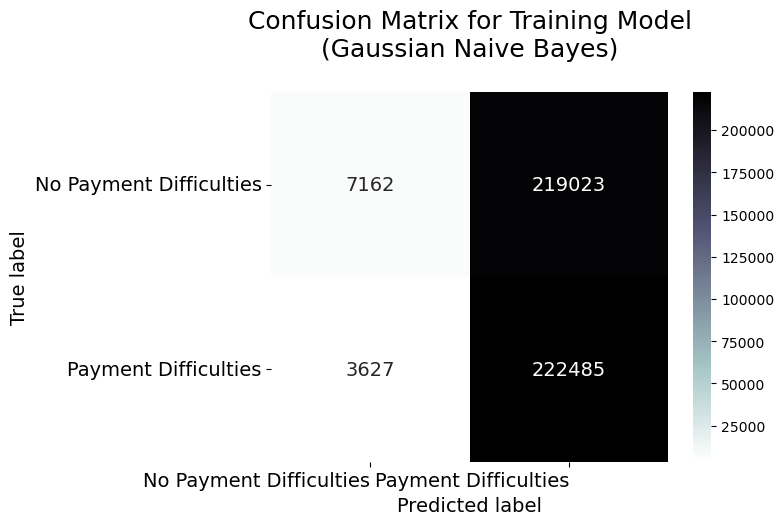

In [92]:
# form confusion matrix as a dataFrame
confusion_matrix_gnb = pd.DataFrame((confusion_matrix(y_train, y_train_pred_gnb)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_gnb, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Gaussian Naive Bayes)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [93]:
# predict data test
y_test_pred_gnb = gnb_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Gaussian Naive Bayes):')
print(classification_report(y_test, y_test_pred_gnb))

Classification Report Testing Model (Gaussian Naive Bayes):
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     56501
           1       0.60      0.00      0.00     56574

    accuracy                           0.50    113075
   macro avg       0.55      0.50      0.33    113075
weighted avg       0.55      0.50      0.33    113075



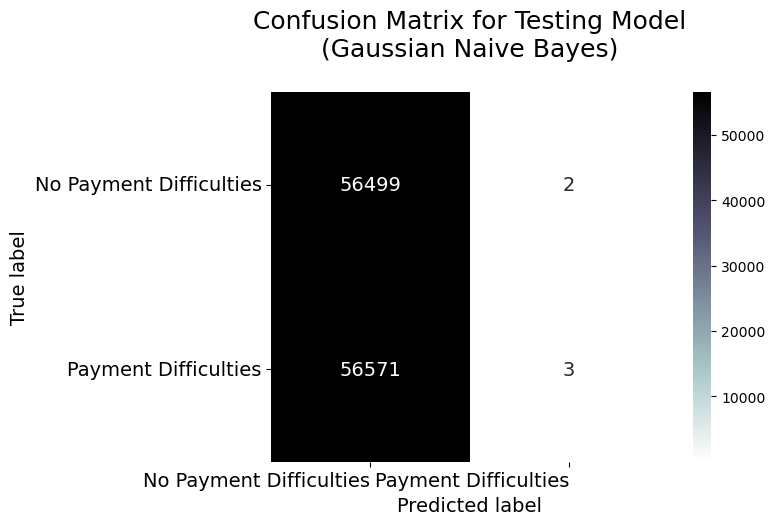

In [94]:
# form confusion matrix as a dataFrame
confusion_matrix_gnb = pd.DataFrame((confusion_matrix(y_test, y_test_pred_gnb)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_gnb, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Gaussian Naive Bayes)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [95]:
acc_nb_train=round(gnb_model.score(X_train,y_train)*100,2)
acc_nb_test=round(gnb_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_nb_train))
print("Test Accuracy: % {}".format(acc_nb_test))

Training Accuracy: % 50.77
Test Accuracy: % 49.97


Dapat terlihat bahwa:
- Model Gaussian Naive Bayes memberikan hasil yang benar sebesar 50.77%.
- Terdapat margin kesalahan sebesar 0.80%.

In [96]:
# ROC scores
roc_auc_gnb = round(roc_auc_score(y_test, y_test_pred_gnb),4)
print('ROC AUC:', roc_auc_gnb)

ROC AUC: 0.5


#### 3. Decision Tree

In [97]:
# train the model
dt_model = DecisionTreeClassifier().fit(X_train,y_train)
print(dt_model)

DecisionTreeClassifier()


In [98]:
# predict data train
y_train_pred_dt = dt_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Decision Tree Classifier):')
print(classification_report(y_train, y_train_pred_dt))

Classification Report Training Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226185
           1       1.00      1.00      1.00    226112

    accuracy                           1.00    452297
   macro avg       1.00      1.00      1.00    452297
weighted avg       1.00      1.00      1.00    452297



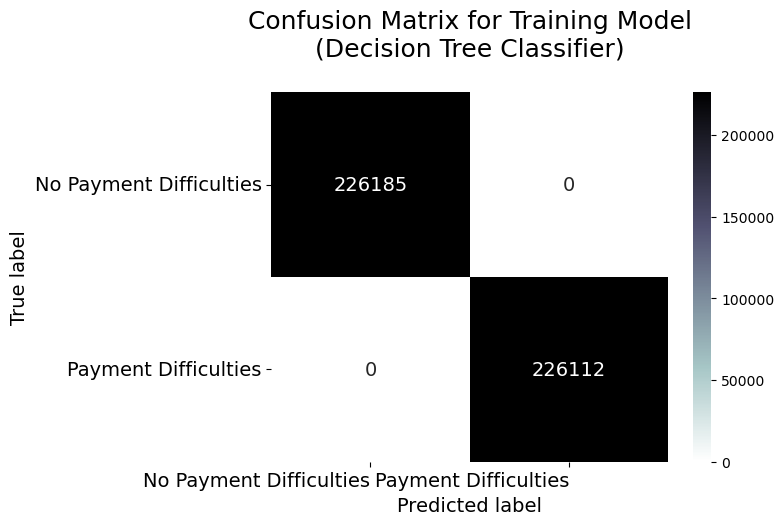

In [99]:
# form confusion matrix as a dataFrame
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_train, y_train_pred_dt)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Decision Tree Classifier)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [100]:
# predict data test
y_test_pred_dt = dt_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Decision Tree Classifier):')
print(classification_report(y_test, y_test_pred_dt))

Classification Report Testing Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       0.89      0.90      0.89     56501
           1       0.90      0.89      0.89     56574

    accuracy                           0.89    113075
   macro avg       0.89      0.89      0.89    113075
weighted avg       0.89      0.89      0.89    113075



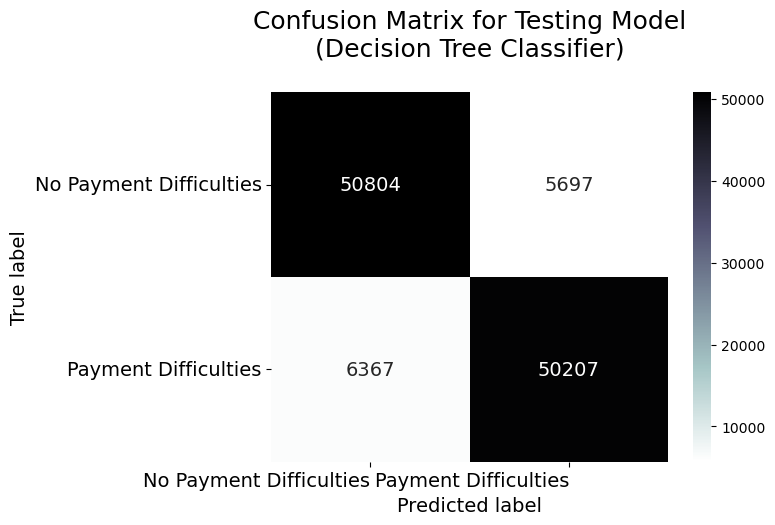

In [101]:
# form confusion matrix as a dataFrame
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_test, y_test_pred_dt)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Decision Tree Classifier)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [102]:
acc_dt_train=round(dt_model.score(X_train,y_train)*100,2)
acc_dt_test=round(dt_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_dt_train))
print("Test Accuracy: % {}".format(acc_dt_test))

Training Accuracy: % 100.0
Test Accuracy: % 89.33


Dapat terlihat bahwa:
- Model pohon keputusan memberikan hasil yang benar sebesar 100%.
- Terdapat margin kesalahan sebesar 10.67%. Hal ini tidak baik untuk data ini.

In [103]:
# ROC scores
roc_auc_dt = round(roc_auc_score(y_test, y_test_pred_dt),4)
print('ROC AUC:', roc_auc_dt)

ROC AUC: 0.8933


##### 4. Random Forest

In [104]:
# train the model
rf_model = RandomForestClassifier().fit(X_train, y_train)
print(rf_model)

RandomForestClassifier()


In [105]:
# predict data train
y_train_pred_dt = rf_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Decision Tree Classifier):')
print(classification_report(y_train, y_train_pred_dt))

Classification Report Training Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226185
           1       1.00      1.00      1.00    226112

    accuracy                           1.00    452297
   macro avg       1.00      1.00      1.00    452297
weighted avg       1.00      1.00      1.00    452297



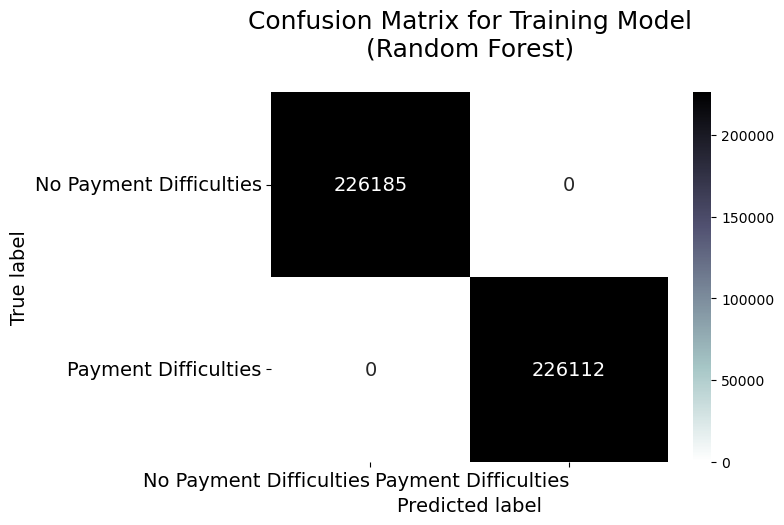

In [106]:
# form confusion matrix as a dataFrame
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_train, y_train_pred_dt)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [107]:
# predict data test
y_test_pred_rf = rf_model.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report

# print classification report
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred_rf))

Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56501
           1       1.00      1.00      1.00     56574

    accuracy                           1.00    113075
   macro avg       1.00      1.00      1.00    113075
weighted avg       1.00      1.00      1.00    113075



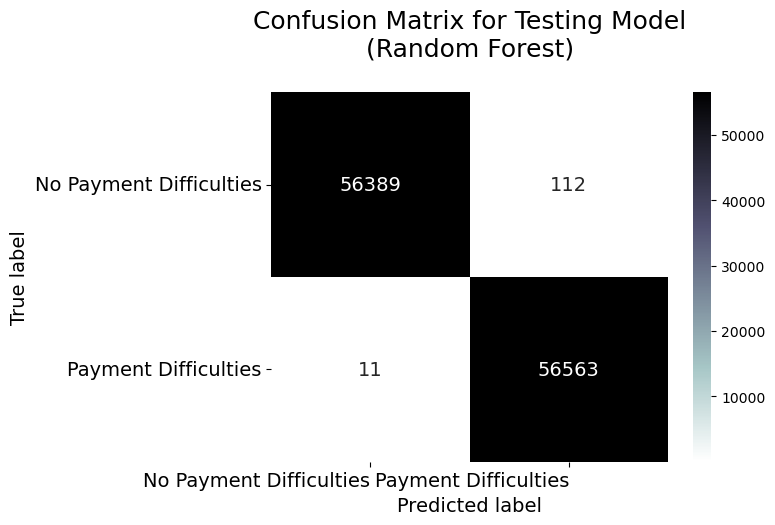

In [108]:
# form confusion matrix as a dataFrame
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_test, y_test_pred_rf)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [109]:
acc_rf_train=round(rf_model.score(X_train,y_train)*100,2)
acc_rf_test=round(rf_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_rf_train))
print("Test Accuracy: % {}".format(acc_rf_test))

Training Accuracy: % 100.0
Test Accuracy: % 99.89


Dapat terlihat bahwa:
- Model Random Forest memberikan hasil yang benar sebesar 100%.
- Terdapat margin kesalahan sebesar 0.11%.

In [110]:
# ROC scores
roc_auc_rf = round(roc_auc_score(y_test, y_test_pred_rf),4)
print('ROC AUC:', roc_auc_rf)

ROC AUC: 0.9989


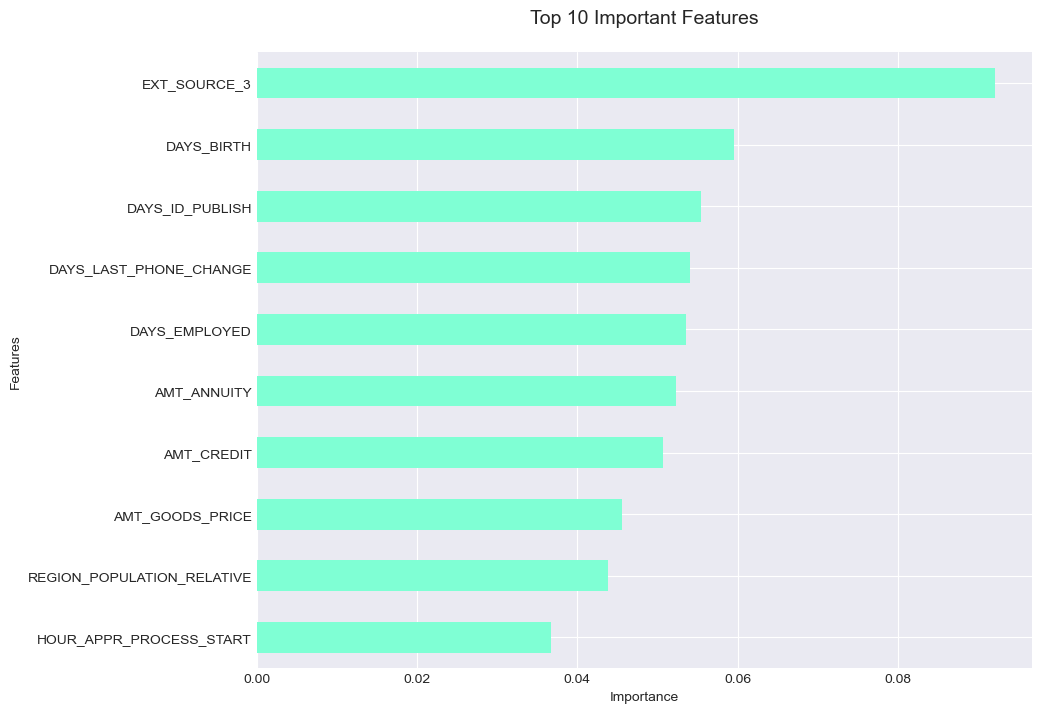

In [116]:
# important features
importances_rf = pd.Series(rf_model.feature_importances_, index=x_balanced.columns).sort_values(ascending=True)

top_10_importances = importances_rf[-10:]
# Plot bar horizontal untuk 10 fitur tersebut
plt.figure(figsize=(10, 8))
top_10_importances.plot(kind='barh', color='aquamarine')
plt.title('Top 10 Important Features\n', fontsize=14)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

fig.figure.savefig('top feature.png')

Plot di atas menegaskan bahwa 5 fitur terpenting adalah `EXT_SOURCE_3`, `DAYS_BIRTH`, `DAYS_ID_PUBLISH`, `DAYS_REGISTRATION` dan `DAYS_LAST_PHONE_CHANGE`

##### 5. k-Nearest Neighbors

In [117]:
# train the model
knn_model = KNeighborsClassifier().fit(X_train,y_train)
print(knn_model)

KNeighborsClassifier()


In [118]:
# predit data train
y_train_pred_knn = knn_model.predict(X_train)

# print classification report
print('Classification Report Training Model (K-Nearest Neighbors):')
print(classification_report(y_train, y_train_pred_knn))

KeyboardInterrupt: 

In [ ]:
# form confusion matrix as a dataFrame
confusion_matrix_knn = pd.DataFrame((confusion_matrix(y_train, y_train_pred_knn)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_knn, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(K-Nearest Neighbors)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
# predit data test
y_test_pred_knn = knn_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (K-Nearest Neighbors):')
print(classification_report(y_test, y_test_pred_knn))

In [ ]:
# form confusion matrix as a dataFrame
confusion_matrix_knn = pd.DataFrame((confusion_matrix(y_test, y_test_pred_knn)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_knn, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(K-Nearest Neighbors)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
acc_knn_train=round(knn_model.score(X_train,y_train)*100,2)
acc_knn_test=round(knn_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_knn_train))
print("Test Accuracy: % {}".format(acc_knn_test))

In [ ]:
results = pd.DataFrame([["Logistic Regression", 0.6716, 0.6729, 0.6729],["Gaussian Naive Bayes", 0.6024, 0.6039, 0.604],
                       ["Decision Tree", 1, 0.8826, 0.8826],["Random Forest", 1, 0.9965, 0.9965],
                       ["K-Nearest Neighbor", 0.9156, 0.8807, 0.8806], ["Neural Network", 0.7001, 0.6948, 0.6948]],
                        columns = ["Models", "Training Accuracy Score", "Testing Accuracy Score", "ROC Score"])

results.sort_values(by=['Training Accuracy Score', 'Testing Accuracy Score'], ascending=False).style.background_gradient(cmap='Blues')

Akurasi prediksi pada data latih dan uji dalam model **Random Forest** memiliki nilai yang tidak jauh berbeda, dapat dikatakan bahwa model tersebut sangat baik, di mana tidak ada **underfitting atau overfitting**. Oleh karena itu, model Random Forest dipilih sebagai **model terbaik untuk memprediksi kemampuan pelanggan dalam membayar kembali pinjaman**.